<a href="https://colab.research.google.com/github/MAbdullah005/Libaraycode/blob/main/Affine%20%20Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

In [38]:
import matplotlib.pyplot as plt
import numpy as np
v = np.array([3, 1])
v

array([3, 1])

In [50]:
def plot_vectors(vector,colors):
     """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
     plt.figure()
     plt.axvline(x=0,color="lightgray")
     plt.axhline(y=0,color="lightgray")

     for i in range(len(vector)):
      x=np.concatenate([[0,0],vector[i]])
      plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],
                          angles='xy',scale_units='xy',scale=1,color=colors[i],)

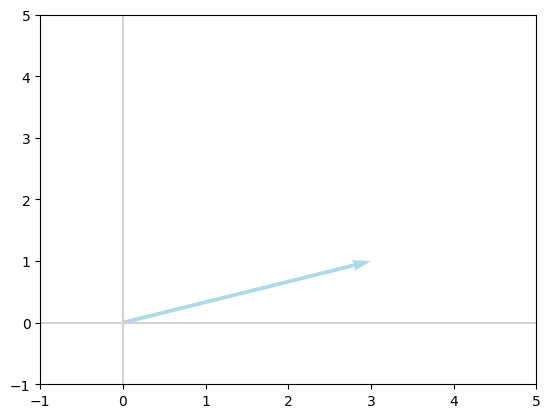

In [41]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
_ =plt.ylim(-1,5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication)
- can linearly transform the vector, e.g, rotate it or rescale it.

In [42]:
I = np.array([[1, 0], [0, 1]])
I


array([[1, 0],
       [0, 1]])

In [43]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [44]:
v == Iv

array([ True,  True])

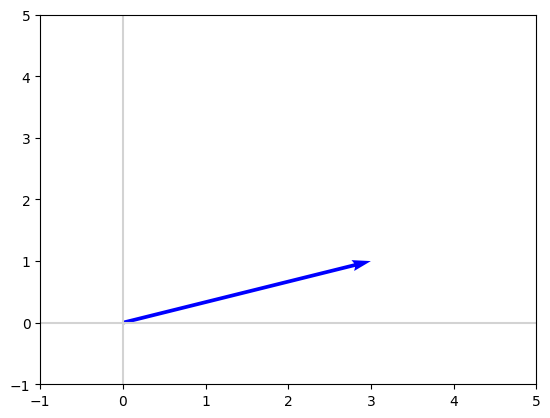

In [48]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis:

In [49]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [51]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

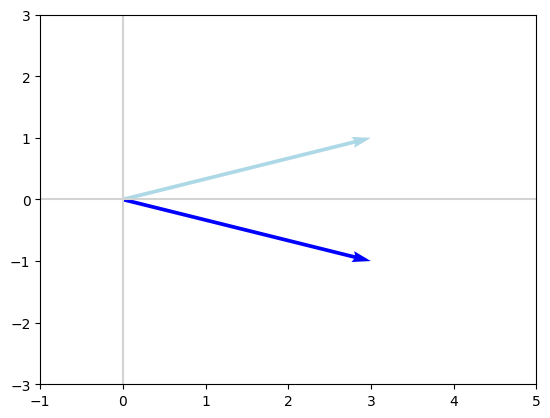

In [52]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis:

In [53]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [54]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

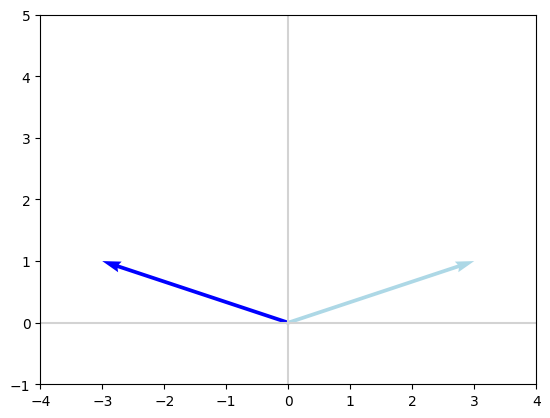

In [55]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation*

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$:

In [56]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [57]:
Av = np.dot(A, v)
Av

array([1, 4])

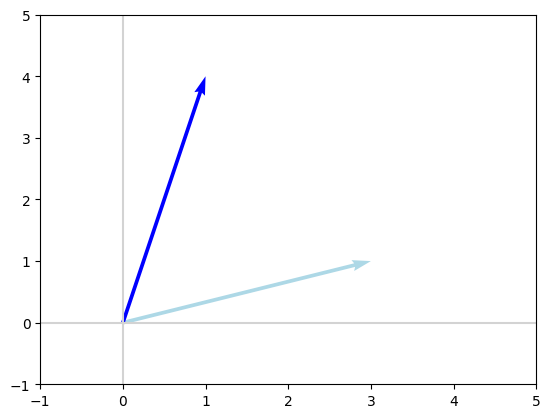

In [58]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

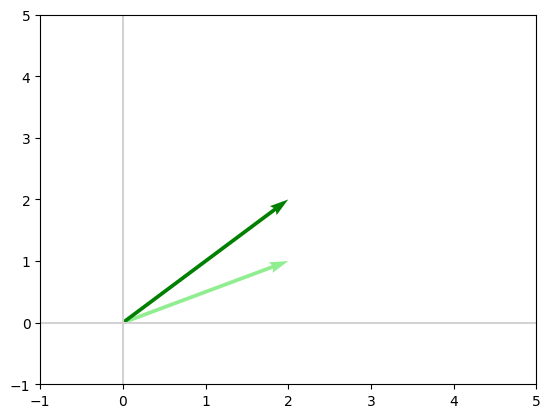

In [59]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector):

In [60]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T

matrix([[3],
        [1]])

In [61]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [62]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [63]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [64]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [65]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [66]:
vectorfy(V, 0)

array([3, 1])

In [67]:
vectorfy(V, 0) == v

array([ True,  True])

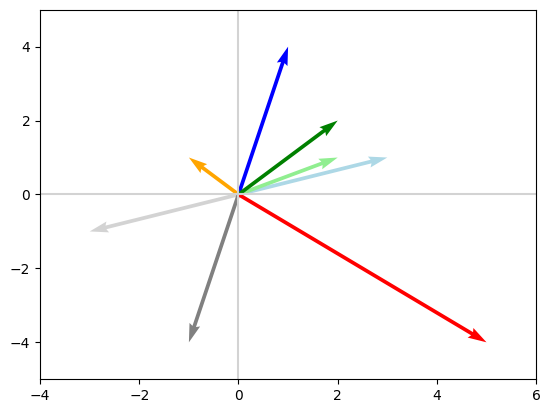

In [68]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues...